In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i][j] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [ ]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")]
)

In [ ]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.RMSprop(),
    metrics=[keras.metrics.Accuracy()]
)

In [ ]:
x_val = x_train[:10000]
x_partialtrain = x_train[10000:]
y_val = y_train[:10000]
y_partialtrain = y_train[10000:]

In [ ]:
history = model.fit(
    x_partialtrain,
    y_partialtrain,
    batch_size=256,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1794 - loss: 0.0037 - val_accuracy: 0.1775 - val_loss: 1.0558
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1925 - loss: 7.1016e-04 - val_accuracy: 0.1867 - val_loss: 1.0916
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2032 - loss: 7.7911e-04 - val_accuracy: 0.1951 - val_loss: 1.1146
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2103 - loss: 3.3131e-04 - val_accuracy: 0.1986 - val_loss: 1.1305
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2150 - loss: 2.7958e-04 - val_accuracy: 0.2129 - val_loss: 1.1719
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2277 - loss: 4.5818e-04 - val_accuracy: 0.2246 - val_loss: 1.2045
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2429 - loss: 1.8310e-04 - val_accuracy: 0.2261 - val_loss: 1.2178
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2493 - loss: 1.3033e-0

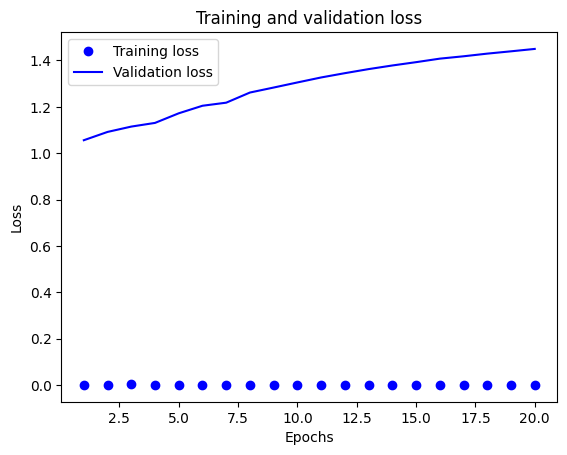

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

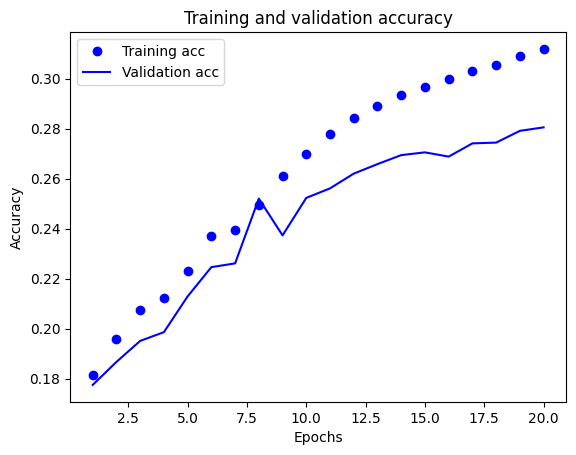

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[6.1378091e-06],
       [1.0000000e+00],
       [1.6367698e-01],
       ...,
       [4.4547201e-07],
       [2.6676877e-05],
       [9.9996263e-01]], dtype=float32)

In [ ]:
model.evaluate(x_val,y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2794 - loss: 1.4177


[1.4496992826461792, 0.28049999475479126]

1. load dataset
2. vectorise the dataset
3. define the model
4. compile model
5. separate out validation set
6. model fit
7. generate graphs
8. predict from trained model